In [1]:
import uproot
from uncertainties import unumpy
from uncertainties import ufloat
import uncertainties
from scipy.optimize import curve_fit
import numpy as np
import mplhep as hep
import copy

In [2]:
from uproot_plotting_tools.Hist import Hist1D
from uproot_plotting_tools.Systematics import Systematics
from uproot_plotting_tools.utils import *

In [3]:
era=18

In [4]:
hep.set_style(hep.style.ROOT)

In [5]:
if era == 18: 
    uproot_file = uproot.open("samplesCR_2018_v6_lo_test.root")
    #from param_dict_18 import param_dict
    lumi=58.877
if era == 17: 
    uproot_file = uproot.open("samplesCR_2017_v6_lo_test.root")
    #from param_dict_17 import param_dict
    lumi=41.86
    
if era == 16: 
    uproot_file = uproot.open("samplesCR_2016_v7_test.root")
    #from param_dict_16 import param_dict
    lumi=35.5

In [6]:
np.full(2,0)

array([0, 0])

In [7]:
class Sample:
    def __init__(self,name,label=0,category=0,kwargs={},uproot_obj=0,hname="{}_nominal_no_zPeak_DiLepMass"):
        self.name = name
        self.label = label
        self.category = category
        self.kwargs = kwargs
        self.regions = {"SR1":0,"CR10":0,"CR13":0,"CR14":0,"SR2":0,"CR20":0,"CR23":0,"CR24":0}
        self.bins = 0
        self.hname = hname
        if uproot_obj: 
            self.uproot_obj = uproot_obj
            self.get_plots()
    @classmethod
    def from_regions(cls,name,regions,kwargs={}):
        temp_cls = cls(name,**kwargs)
        temp_cls.regions = copy.deepcopy(regions)
        return temp_cls
    def get_plots(self):
        for key in self.regions:
            hname = "{}/{}".format(self.name,self.hname).format(key)
            print(hname)
            hist = Hist1D.from_uproot(self.uproot_obj[hname])
            self.regions[key] = hist
    def reset_plot(self,bin_edges):
        for key in self.regions:
            n_bins = len(bin_edges) - 1
            self.regions[key] = Hist1D(bin_edges, np.full(n_bins,0), np.full(n_bins,0))
    def add(self,other):
        new_regions = {}
        for key in self.regions:
                new_regions[key] = self.regions[key].add(other.regions[key])
        name = "{} + {}".format(self.name,other.name)
        return Sample.from_regions(name,new_regions)

    def __repr__(self):
        return "Name: {} Cat: {} regions: {}".format(self.name, self.category, self.regions)
        
samples = [
    Sample('data_el', label='data', category='data', kwargs={'color': 'black'}, uproot_obj=uproot_file),
    Sample('data_mu', label='data', category='data', kwargs={'color': 'black'}, uproot_obj=uproot_file),

    Sample('BFFZprimeToMuMu_M_200', label='200 $\delta_{bs}=0.04$', category='signal', kwargs={'color': '#6633ff'}, uproot_obj=uproot_file),
    Sample('BFFZprimeToMuMu_M_200_dbs0p5', label='200 $\delta_{bs}=0.5$', category='signal', kwargs={'color': '#3900e6','linestyle':'--'}, uproot_obj=uproot_file),
    Sample('BFFZprimeToMuMu_M_200_dbs1p0', label='200 $\delta_{bs}=1.0$', category='signal', kwargs={'color': '#260099','linestyle':'-.'}, uproot_obj=uproot_file),
    Sample('BFFZprimeToMuMu_M_350', label='350 $\delta_{bs}=0.04$', category='signal', kwargs={'color': '#ff33ff'}, uproot_obj=uproot_file),
    Sample('BFFZprimeToMuMu_M_350_dbs0p5', label='350 $\delta_{bs}=0.5$', category='signal', kwargs={'color': '#e600e6','linestyle':'--'}, uproot_obj=uproot_file),
    Sample('BFFZprimeToMuMu_M_350_dbs1p0', label='350 $\delta_{bs}=1.0$', category='signal', kwargs={'color': '#990099','linestyle':'-.'}, uproot_obj=uproot_file),
    Sample('BFFZprimeToMuMu_M_500', label='500 $\delta_{bs}=0.04$', category='signal', kwargs={'color': '#ff3366'}, uproot_obj=uproot_file),
    Sample('BFFZprimeToMuMu_M_500_dbs0p5', label='500 $\delta_{bs}=0.5$', category='signal', kwargs={'color': '#e60039','linestyle':'--'}, uproot_obj=uproot_file),
    Sample('BFFZprimeToMuMu_M_500_dbs1p0', label='500 $\delta_{bs}=1.0$', category='signal', kwargs={'color': '#990026','linestyle':'-.'}, uproot_obj=uproot_file),

    Sample('mc_zz', label='WW/WZ/ZZ', category='background', kwargs={'color': '#ccffcc'}, uproot_obj=uproot_file),
    Sample('mc_wz', label='WW/WZ/ZZ', category='background', kwargs={'color': '#ccffcc'}, uproot_obj=uproot_file),
    Sample('mc_ww', label='WW/WZ/ZZ', category='background', kwargs={'color': '#ccffcc'}, uproot_obj=uproot_file),
    Sample('mc_stop', label='ST', category='background', kwargs={'color': '#ffccff'}, uproot_obj=uproot_file),
    Sample('mc_santitop', label='ST', category='background', kwargs={'color': '#ffccff'}, uproot_obj=uproot_file),
    Sample('mc_ttbar', label='TT', category='background', kwargs={'color': '#ffff99'}, uproot_obj=uproot_file),
    Sample('ZToMuMu_M_50_120', label='DY', category='background', kwargs={'color': '#99ffff'}, uproot_obj=uproot_file),
    Sample('ZToMuMu_M_120_200', label='DY', category='background', kwargs={'color': '#99ffff'}, uproot_obj=uproot_file),
    Sample('ZToMuMu_M_200_400', label='DY', category='background', kwargs={'color': '#99ffff'}, uproot_obj=uproot_file),
    Sample('ZToMuMu_M_800_1400', label='DY', category='background', kwargs={'color': '#99ffff'}, uproot_obj=uproot_file),
    Sample('ZToMuMu_M_400_800', label='DY', category='background', kwargs={'color': '#99ffff'}, uproot_obj=uproot_file),
    Sample('ZToEE_M_50_120', label='DY', category='background', kwargs={'color': '#99ffff'}, uproot_obj=uproot_file),
    Sample('ZToEE_M_120_200', label='DY', category='background', kwargs={'color': '#99ffff'}, uproot_obj=uproot_file),
    Sample('ZToEE_M_200_400', label='DY', category='background', kwargs={'color': '#99ffff'}, uproot_obj=uproot_file),
    Sample('ZToEE_M_800_1400', label='DY', category='background', kwargs={'color': '#99ffff'},uproot_obj=uproot_file),
    Sample('ZToEE_M_400_800', label='DY', category='background', kwargs={'color': '#99ffff'},uproot_obj=uproot_file)
    ]

data_el/SR1_nominal_no_zPeak_DiLepMass
data_el/CR10_nominal_no_zPeak_DiLepMass
data_el/CR13_nominal_no_zPeak_DiLepMass
data_el/CR14_nominal_no_zPeak_DiLepMass
data_el/SR2_nominal_no_zPeak_DiLepMass
data_el/CR20_nominal_no_zPeak_DiLepMass
data_el/CR23_nominal_no_zPeak_DiLepMass
data_el/CR24_nominal_no_zPeak_DiLepMass
data_mu/SR1_nominal_no_zPeak_DiLepMass
data_mu/CR10_nominal_no_zPeak_DiLepMass
data_mu/CR13_nominal_no_zPeak_DiLepMass
data_mu/CR14_nominal_no_zPeak_DiLepMass
data_mu/SR2_nominal_no_zPeak_DiLepMass
data_mu/CR20_nominal_no_zPeak_DiLepMass
data_mu/CR23_nominal_no_zPeak_DiLepMass
data_mu/CR24_nominal_no_zPeak_DiLepMass
BFFZprimeToMuMu_M_200/SR1_nominal_no_zPeak_DiLepMass
BFFZprimeToMuMu_M_200/CR10_nominal_no_zPeak_DiLepMass
BFFZprimeToMuMu_M_200/CR13_nominal_no_zPeak_DiLepMass
BFFZprimeToMuMu_M_200/CR14_nominal_no_zPeak_DiLepMass
BFFZprimeToMuMu_M_200/SR2_nominal_no_zPeak_DiLepMass
BFFZprimeToMuMu_M_200/CR20_nominal_no_zPeak_DiLepMass
BFFZprimeToMuMu_M_200/CR23_nominal_no_zPea

ZToEE_M_50_120/CR23_nominal_no_zPeak_DiLepMass
ZToEE_M_50_120/CR24_nominal_no_zPeak_DiLepMass
ZToEE_M_120_200/SR1_nominal_no_zPeak_DiLepMass
ZToEE_M_120_200/CR10_nominal_no_zPeak_DiLepMass
ZToEE_M_120_200/CR13_nominal_no_zPeak_DiLepMass
ZToEE_M_120_200/CR14_nominal_no_zPeak_DiLepMass
ZToEE_M_120_200/SR2_nominal_no_zPeak_DiLepMass
ZToEE_M_120_200/CR20_nominal_no_zPeak_DiLepMass
ZToEE_M_120_200/CR23_nominal_no_zPeak_DiLepMass
ZToEE_M_120_200/CR24_nominal_no_zPeak_DiLepMass
ZToEE_M_200_400/SR1_nominal_no_zPeak_DiLepMass
ZToEE_M_200_400/CR10_nominal_no_zPeak_DiLepMass
ZToEE_M_200_400/CR13_nominal_no_zPeak_DiLepMass
ZToEE_M_200_400/CR14_nominal_no_zPeak_DiLepMass
ZToEE_M_200_400/SR2_nominal_no_zPeak_DiLepMass
ZToEE_M_200_400/CR20_nominal_no_zPeak_DiLepMass
ZToEE_M_200_400/CR23_nominal_no_zPeak_DiLepMass
ZToEE_M_200_400/CR24_nominal_no_zPeak_DiLepMass
ZToEE_M_800_1400/SR1_nominal_no_zPeak_DiLepMass
ZToEE_M_800_1400/CR10_nominal_no_zPeak_DiLepMass
ZToEE_M_800_1400/CR13_nominal_no_zPeak_DiLepM

In [8]:
samples[-13]

Name: mc_stop Cat: background regions: {'SR1': Name: 0 Sum:129.84 Var:29.45 Range:120.0-800.0 nBins: 136, 'CR10': Name: 0 Sum:70.58 Var:17.12 Range:120.0-800.0 nBins: 136, 'CR13': Name: 0 Sum:95.00 Var:21.81 Range:120.0-800.0 nBins: 136, 'CR14': Name: 0 Sum:51.30 Var:18.04 Range:120.0-800.0 nBins: 136, 'SR2': Name: 0 Sum:62.97 Var:14.72 Range:120.0-800.0 nBins: 136, 'CR20': Name: 0 Sum:19.49 Var:4.94 Range:120.0-800.0 nBins: 136, 'CR23': Name: 0 Sum:48.66 Var:13.31 Range:120.0-800.0 nBins: 136, 'CR24': Name: 0 Sum:15.67 Var:3.92 Range:120.0-800.0 nBins: 136}

In [9]:
samples[-12]

Name: mc_santitop Cat: background regions: {'SR1': Name: 0 Sum:129.00 Var:37.82 Range:120.0-800.0 nBins: 136, 'CR10': Name: 0 Sum:78.80 Var:25.11 Range:120.0-800.0 nBins: 136, 'CR13': Name: 0 Sum:92.79 Var:26.42 Range:120.0-800.0 nBins: 136, 'CR14': Name: 0 Sum:58.57 Var:17.79 Range:120.0-800.0 nBins: 136, 'SR2': Name: 0 Sum:73.18 Var:22.93 Range:120.0-800.0 nBins: 136, 'CR20': Name: 0 Sum:17.73 Var:5.25 Range:120.0-800.0 nBins: 136, 'CR23': Name: 0 Sum:42.59 Var:12.27 Range:120.0-800.0 nBins: 136, 'CR24': Name: 0 Sum:13.28 Var:4.16 Range:120.0-800.0 nBins: 136}

In [10]:
add_sample = samples[-12].add(samples[-13])
add_sample

Name: mc_santitop + mc_stop Cat: 0 regions: {'SR1': Name: 0 Sum:258.84 Var:67.27 Range:120.0-800.0 nBins: 136, 'CR10': Name: 0 Sum:149.38 Var:42.23 Range:120.0-800.0 nBins: 136, 'CR13': Name: 0 Sum:187.79 Var:48.23 Range:120.0-800.0 nBins: 136, 'CR14': Name: 0 Sum:109.87 Var:35.82 Range:120.0-800.0 nBins: 136, 'SR2': Name: 0 Sum:136.15 Var:37.65 Range:120.0-800.0 nBins: 136, 'CR20': Name: 0 Sum:37.22 Var:10.19 Range:120.0-800.0 nBins: 136, 'CR23': Name: 0 Sum:91.25 Var:25.58 Range:120.0-800.0 nBins: 136, 'CR24': Name: 0 Sum:28.95 Var:8.07 Range:120.0-800.0 nBins: 136}

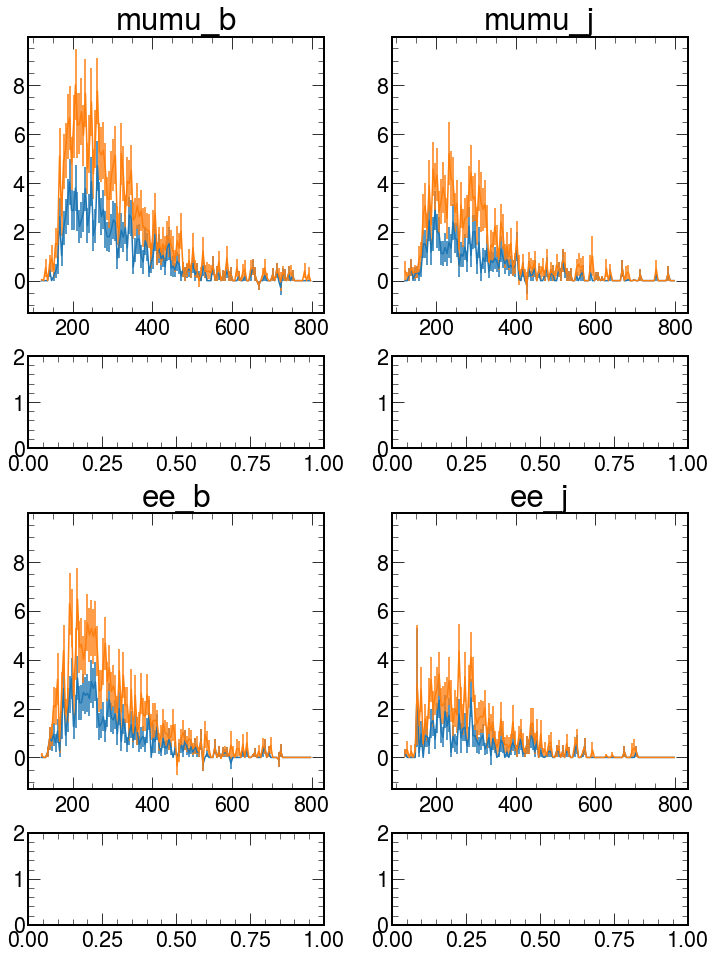

In [11]:
fig, ax = abcd_template(("mumu_b","mumu_j","ee_b","ee_j"),yscale="linear")

samples[-13].regions['SR1'].plot(ax[0][0])
samples[-13].regions['CR10'].plot(ax[1][0])
samples[-13].regions['CR13'].plot(ax[2][0])
samples[-13].regions['CR14'].plot(ax[3][0])

add_sample.regions['SR1'].plot(ax[0][0])
add_sample.regions['CR10'].plot(ax[1][0])
add_sample.regions['CR13'].plot(ax[2][0])
add_sample.regions['CR14'].plot(ax[3][0])


In [12]:
bckground = Sample("MC_background")
bin_edges = samples[0].regions['CR10'].bin_edges
bckground.reset_plot(bin_edges)
print(bckground)
n_samples = 0
for sample in samples:
    if sample.category == "background":
        bckground = bckground.add(sample)
bckground

Name: MC_background Cat: 0 regions: {'SR1': Name: 0 Sum:0.00 Var:0.00 Range:120.0-800.0 nBins: 136, 'CR10': Name: 0 Sum:0.00 Var:0.00 Range:120.0-800.0 nBins: 136, 'CR13': Name: 0 Sum:0.00 Var:0.00 Range:120.0-800.0 nBins: 136, 'CR14': Name: 0 Sum:0.00 Var:0.00 Range:120.0-800.0 nBins: 136, 'SR2': Name: 0 Sum:0.00 Var:0.00 Range:120.0-800.0 nBins: 136, 'CR20': Name: 0 Sum:0.00 Var:0.00 Range:120.0-800.0 nBins: 136, 'CR23': Name: 0 Sum:0.00 Var:0.00 Range:120.0-800.0 nBins: 136, 'CR24': Name: 0 Sum:0.00 Var:0.00 Range:120.0-800.0 nBins: 136}


Name: MC_background + mc_zz + mc_wz + mc_ww + mc_stop + mc_santitop + mc_ttbar + ZToMuMu_M_50_120 + ZToMuMu_M_120_200 + ZToMuMu_M_200_400 + ZToMuMu_M_800_1400 + ZToMuMu_M_400_800 + ZToEE_M_50_120 + ZToEE_M_120_200 + ZToEE_M_200_400 + ZToEE_M_800_1400 + ZToEE_M_400_800 Cat: 0 regions: {'SR1': Name: 0 Sum:2593.49 Var:7471.61 Range:120.0-800.0 nBins: 136, 'CR10': Name: 0 Sum:19288.48 Var:127990.43 Range:120.0-800.0 nBins: 136, 'CR13': Name: 0 Sum:2025.16 Var:7573.59 Range:120.0-800.0 nBins: 136, 'CR14': Name: 0 Sum:14307.82 Var:67509.56 Range:120.0-800.0 nBins: 136, 'SR2': Name: 0 Sum:1115.76 Var:763.24 Range:120.0-800.0 nBins: 136, 'CR20': Name: 0 Sum:3404.89 Var:12275.76 Range:120.0-800.0 nBins: 136, 'CR23': Name: 0 Sum:798.71 Var:987.08 Range:120.0-800.0 nBins: 136, 'CR24': Name: 0 Sum:2408.25 Var:8292.98 Range:120.0-800.0 nBins: 136}

(0.1, 1328.2145774598332)

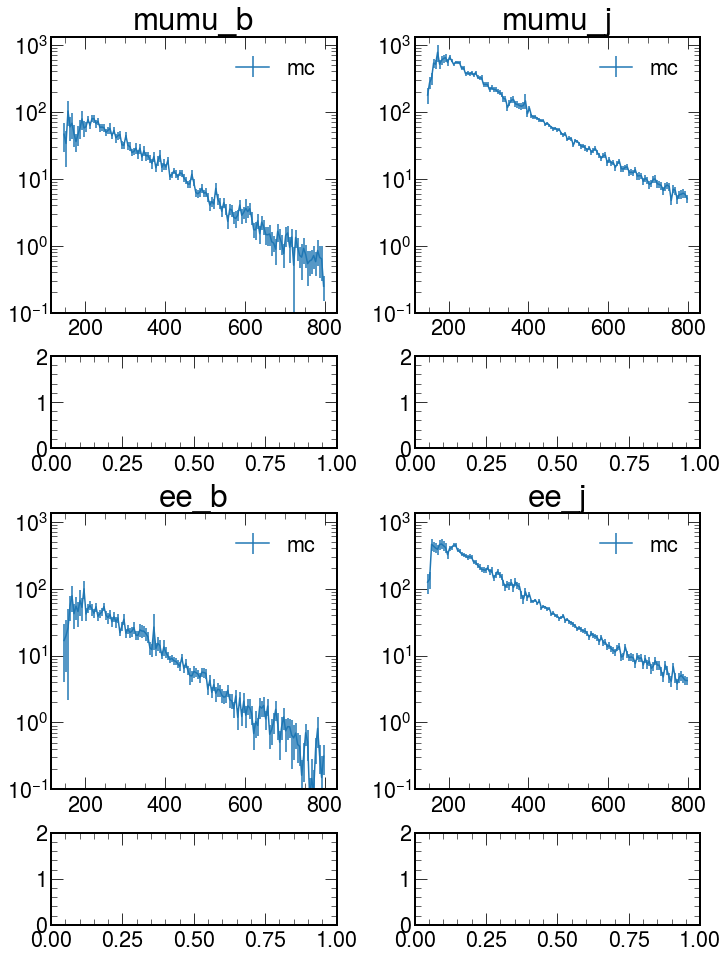

In [17]:
fig, ax = abcd_template(("mumu_b","mumu_j","ee_b","ee_j"),yscale="log")

regions = ['SR{}','CR{}0','CR{}3','CR{}4']
nJet = 1

for i, reg in enumerate(regions):
    reg = reg.format(nJet)
    bckground.regions[reg].range(140,999).plot(ax[i][0],kwargs={"label":"mc"})
    ax[i][0].legend()

ax[0][0].set_ylim(bottom=.1)

In [14]:
def comb_lists(list_of_list):
    appended_list = []
    for l_list in list_of_list:
        appended_list += list(l_list)
    return np.array(appended_list)
def make_comb_plot(hist,nJets):
    mumu_j = "CR{}0".format(nJets)
    ee_b = "CR{}3".format(nJets)
    ee_j = "CR{}4".format(nJets)
    plots = comb_lists([hist.regions[mumu_j].plot,hist.regions[ee_b].plot,hist.regions[ee_j].plot])
    stdev = comb_lists([hist.regions[mumu_j].standard_dev(),hist.regions[ee_b].standard_dev(),hist.regions[ee_j].standard_dev()])
    return plots, stdev

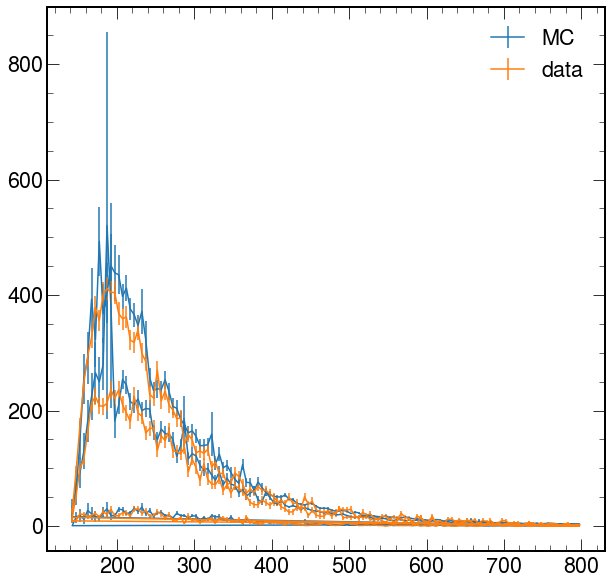

In [353]:
target,stdev = make_comb_plot(bckground,1)
target_data,stdev_data = make_comb_plot(data,1)

bins = bckground.regions['CR10'].bins
comb_bins = comb_lists([bins,bins,bins])
plt.errorbar(comb_bins,target,yerr=stdev,label="MC")
plt.errorbar(comb_bins,target_data,yerr=stdev_data,label="data")
plt.legend()

In [354]:
def abcd_fit(bins, norm_mumu_j, norm_ee_b, norm_ee_j, sigma, theta, mean, slope,log_norm=log_norm):
    bins = np.array(bins)
    mumu_j = log_norm(bins, norm_mumu_j, sigma, theta, mean, slope)
    ee_b = log_norm(bins, norm_ee_b, sigma, theta, mean, slope)
    ee_j = log_norm(bins, norm_ee_j, sigma, theta, mean, slope)
    return list(mumu_j)+list(ee_b)+list(ee_j)

In [355]:
def predict_background(target, nJets):
    plt, std = make_comb_plot(target,nJets)
    popt,pcov = curve_fit(abcd_fit,bins,plt,
                    p0=np.asarray([100,100,100,.6,100,100,1]),
                    bounds=(0, [np.inf,np.inf,np.inf,np.inf,np.inf,139,np.inf]),
                    sigma = (std+.1),
                    absolute_sigma=True)
    print("fit: {} cov: {}".format(popt,pcov))
    corr_values = uncertainties.correlated_values(popt, pcov)
    mumu_j,ee_b,ee_j = np.asarray(abcd_fit(bins,*corr_values,log_norm=log_norm_unc)).reshape(3,-1)
    return  mumu_j*ee_b/ee_j, mumu_j,ee_b,ee_j

In [356]:
abcd_pred, mumu_j,ee_b,ee_j = predict_background(bckground,1)
#abcd_pred_data, mumu_j_data,ee_b_data,ee_j_data = predict_background(data,1)
abcd_pred_2, mumu_j_2,ee_b_2,ee_j_2 = predict_background(bckground,2)
#abcd_pred_data_2, mumu_j_data_2,ee_b_data_2,ee_j_data_2 = predict_background(data,2)

fit: [528.76987905  44.75180333 380.74259731   0.73530863 134.40798089
  84.9269437    1.12026639] cov: [[ 1.12627630e+17  9.53210416e+15  8.10979184e+16  1.73097416e+05
   2.34532793e+07 -5.58143663e+07 -2.38615991e+14]
 [ 9.53210416e+15  8.06738181e+14  6.86362487e+15  1.46498917e+04
   1.98494012e+06 -4.72378175e+06 -2.01949777e+13]
 [ 8.10979184e+16  6.86362487e+15  5.83948392e+16  1.24639398e+05
   1.68876155e+07 -4.01893291e+07 -1.71816278e+14]
 [ 1.73097416e+05  1.46498917e+04  1.24639398e+05  3.75430325e-05
   3.15759821e-03 -6.98234265e-03 -3.66728900e+02]
 [ 2.34532793e+07  1.98494012e+06  1.68876155e+07  3.15759821e-03
   4.95742434e-01 -6.21257039e-01 -4.96887602e+04]
 [-5.58143663e+07 -4.72378175e+06 -4.01893291e+07 -6.98234265e-03
  -6.21257039e-01  1.46558552e+00  1.18249838e+05]
 [-2.38615991e+14 -2.01949777e+13 -1.71816278e+14 -3.66728900e+02
  -4.96887602e+04  1.18249838e+05  5.05538394e+11]]
fit: [2.88125987e+02 5.97731649e+01 2.23622626e+02 6.67988507e-01
 1.4003492

In [357]:
def plot_fit(region,fit):
    bins = bckground.regions[region].bins
    target_plot = bckground.regions[region].plot
    target_stddev = bckground.regions[region].standard_dev()
    fit_nom, fit_std = to_nom_std(fit)
    
    plt.errorbar(bins,target_plot,yerr=target_stddev,label="target")
    plt.errorbar(bins,fit_nom,yerr=fit_std,label="fit")
    plt.legend()
    chi2 = np.sum((fit_nom-target_plot)**2/(fit_std**2+target_stddev**2))/(len(fit_nom)-6)
    print(chi2)
    plt.xlabel("GeV")
    plt.title("{} chi2: {:.2f}".format(region,chi2))
    plt.savefig("output/fit_quality_{}_{}.pdf".format(region,era))

1.2605785853801907


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


2.3096908398561777


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


1.0957673285155056


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


2.1941591182410045


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


1.4361438341759445


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


1.828440510617556


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


1.3119608450229638


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


2.1097168791731185


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


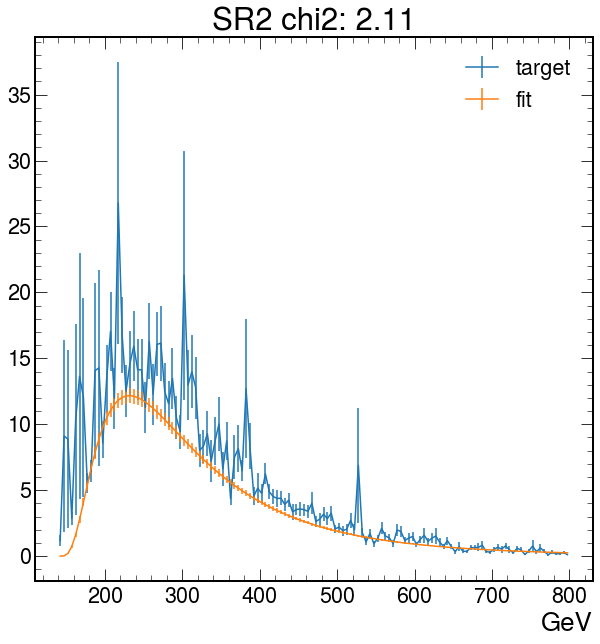

In [358]:
plot_fit("CR10",mumu_j)
plt.clf()
plot_fit("CR13",ee_b)
plt.clf()
plot_fit("CR14",ee_j)
plt.clf()
plot_fit("SR1",abcd_pred)
plt.clf()
plot_fit("CR20",mumu_j_2)
plt.clf()
plot_fit("CR23",ee_b_2)
plt.clf()
plot_fit("CR24",ee_j_2)
plt.clf()
plot_fit("SR2",abcd_pred_2)

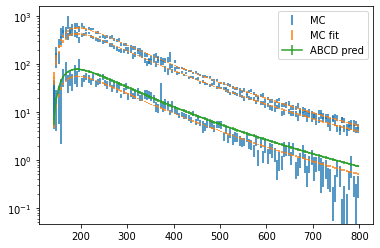

In [269]:
bins = bckground.regions['CR10'].bins
comb_bins = comb_lists([bins,bins,bins])
plt.errorbar(comb_bins,target,yerr=stdev,label="MC", linestyle="")
com_unc = np.concatenate([mumu_j,ee_b,ee_j])
nom_mc,std_mc = to_nom_std(com_unc)
plt.errorbar(comb_bins,nom_mc,yerr=std_mc,label="MC fit", linestyle="")
plt.errorbar(bins,nom_mc_abcd,yerr=std_mc_abcd,label="ABCD pred")
plt.yscale('log')
plt.legend()


array([1.24084519e+05, 2.32474141e+05, 3.58426347e+05, 4.87735963e+05,
       6.09576901e+05, 7.17078897e+05, 8.06724859e+05, 8.77442054e+05,
       9.29761228e+05, 9.65159870e+05, 9.85594931e+05, 9.93192018e+05,
       9.90051320e+05, 9.78135437e+05, 9.59212056e+05, 9.34831903e+05,
       9.06328303e+05, 8.74829211e+05, 8.41275699e+05, 8.06443106e+05,
       7.70962537e+05, 7.35341364e+05, 6.99982033e+05, 6.65198850e+05,
       6.31232708e+05, 5.98263802e+05, 5.66422509e+05, 5.35798609e+05,
       5.06449047e+05, 4.78404426e+05, 4.51674411e+05, 4.26252211e+05,
       4.02118267e+05, 3.79243283e+05, 3.57590705e+05, 3.37118730e+05,
       3.17781940e+05, 2.99532606e+05, 2.82321737e+05, 2.66099904e+05,
       2.50817895e+05, 2.36427208e+05, 2.22880441e+05, 2.10131569e+05,
       1.98136158e+05, 1.86851498e+05, 1.76236699e+05, 1.66252739e+05,
       1.56862482e+05, 1.48030668e+05, 1.39723887e+05, 1.31910539e+05,
       1.24560778e+05, 1.17646449e+05, 1.11141028e+05, 1.05019543e+05,
      

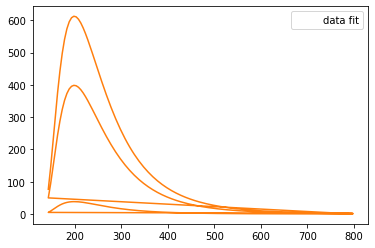

In [270]:
bins = data.regions['CR10'].bins
comb_bins = comb_lists([bins,bins,bins])
#plt.errorbar(comb_bins,target_data,yerr=stdev,label="data", linestyle="")
com_unc = np.concatenate([mumu_j_data,ee_b_data,ee_j_data ])
nom_data,std_data = to_nom_std(com_unc)
plt.errorbar(comb_bins,nom_data,label="data fit", linestyle="")
#plt.errorbar(bins,nom_data_abcd,label="ABCD pred")
plt.legend()

plt.plot(comb_bins,nom_data)
std_data

<ErrorbarContainer object of 3 artists>

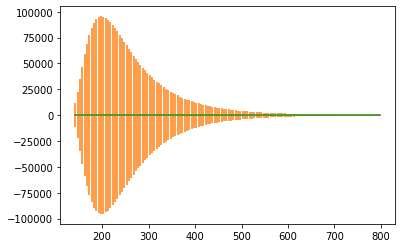

In [271]:
def to_nom_std(unparray):
    return unumpy.nominal_values(unparray), unumpy.std_devs(unparray)
nom_mc_abcd,std_mc_abcd = to_nom_std(abcd_pred)
nom_data_abcd,std_data_abcd = to_nom_std(abcd_pred_data)
plt.errorbar(bins,nom_mc_abcd,yerr=std_mc_abcd,label="MC ABCD")
plt.errorbar(bins,nom_data_abcd,yerr=std_data_abcd,label="data ABCD")
mc_plot = bckground.regions["SR1"].plot
mc_std = bckground.regions["SR1"].standard_dev()
plt.errorbar(bins,mc_plot,yerr=mc_std,label="MC")

In [170]:
popt,pcov = curve_fit(abcd_fit,bins,target_data,
                    p0=np.asarray([100,100,100,.6,100,100,0]),
                    sigma = (target_data+1)**.5,
                    absolute_sigma=True)
#popt,pcov = curve_fit(abcd_fit,bins,target_data,
#                    p0=np.asarray([100,100,100,.6,100,100,0]))

In [171]:
popt

array([133.3375505 ,  12.46094931,  88.71218603,   0.74182581,
       132.37165235,  85.47827241,   7.3052473 ])

In [272]:
mumu_j_fit, ee_b_fit, ee_j_fit =  np.array(abcd_fit(bins,*popt)).reshape(3,-1)
mumu_j, ee_b, ee_j = abcd_comb.reshape(3,-1)

0.8891926196344254


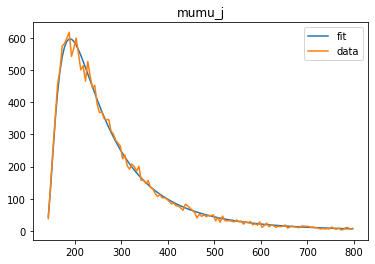

In [273]:
plt.title("mumu_j")
plt.plot(bins,mumu_j_fit, label="fit")
plt.plot(bins,mumu_j, label="data")

#popt_ln,pcov_ln = curve_fit(log_norm,bins,mumu_j,p0=np.asarray([100,.6,100,100]))
#fit2 = log_norm(bins, *popt_ln)
#plt.plot(bins,fit2, label="fit2 ")
#print(np.sum((fit2-mumu_j)**2/mumu_j)/(len(fit2)-6) )

print(np.sum((mumu_j_fit-mumu_j)**2/mumu_j_fit)/(len(mumu_j_fit)-6) )


plt.legend()

1.5865000350750191


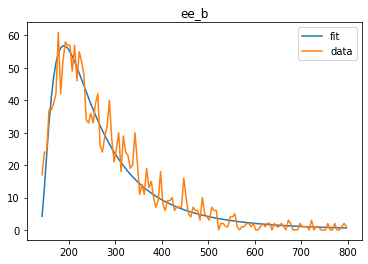

In [274]:
plt.title("ee_b")
plt.plot(bins,ee_b_fit, label="fit")
plt.plot(bins,ee_b, label="data")



#popt_ln,pcov_ln = curve_fit(log_norm,bins,ee_b,p0=np.asarray([100,.6,100,100,1]))
#fit2 = log_norm(bins, *popt_ln)
#plt.plot(bins,fit2, label="fit2 ")
#plt.legend()
#print(np.sum((fit2-ee_b)**2/(ee_b+.1))/(len(fit2)-6) )


plt.legend()

print(np.sum((ee_b_fit-ee_b)**2/(ee_b_fit+.1))/(len(ee_b_fit)-6) )

1.0418959842564253


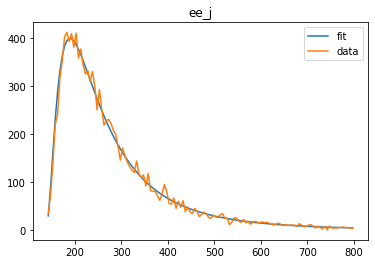

In [275]:
plt.title("ee_j")
plt.plot(bins,ee_j_fit, label="fit")
plt.plot(bins,ee_j, label="data")

#popt_ln,pcov_ln = curve_fit(log_norm,bins[4:],ee_j[4:],p0=np.asarray([100,.6,100,100]))
#fit2 = log_norm(bins, *popt_ln)
#plt.plot(bins,fit2, label="fit2 ")
#print(np.sum((fit2-ee_j)**2/ee_j)/(len(fit2)-6) )
plt.legend()

print(np.sum((ee_j_fit-ee_j)**2/ee_j_fit)/(len(ee_j_fit)-6) )


In [256]:
samples = []
for key in uproot_file.iterkeys():
    print(key)

lumi;1
BFFZprimeToMuMu_M_200;1
BFFZprimeToMuMu_M_200/total_Weight;1
BFFZprimeToMuMu_M_200/CR10_nominal_no_zPeak_no_zkin_cut_HTLT;1
BFFZprimeToMuMu_M_200/CR10_nominal_no_zPeak_no_zkin_cut_RelMET;1
BFFZprimeToMuMu_M_200/CR10_nominal_no_zPeak_no_zkin_cut_SBM;1
BFFZprimeToMuMu_M_200/CR10_nominal_no_zPeak_no_zkin_cut_DiLepMass;1
BFFZprimeToMuMu_M_200/CR10_nominal_no_zPeak_no_zkin_cut_W_PU_central;1
BFFZprimeToMuMu_M_200/CR10_nominal_no_zPeak_no_zkin_cut_W_PU_up;1
BFFZprimeToMuMu_M_200/CR10_nominal_no_zPeak_no_zkin_cut_W_PU_down;1
BFFZprimeToMuMu_M_200/CR10_nominal_no_zPeak_no_zkin_cut_W_BTagSF_central;1
BFFZprimeToMuMu_M_200/CR10_nominal_no_zPeak_no_zkin_cut_W_BTagSF_up;1
BFFZprimeToMuMu_M_200/CR10_nominal_no_zPeak_no_zkin_cut_W_BTagSF_down;1
BFFZprimeToMuMu_M_200/CR10_nominal_no_zPeak_no_zkin_cut_W_PUIDSF_central;1
BFFZprimeToMuMu_M_200/CR10_nominal_no_zPeak_no_zkin_cut_W_PUIDSF_up;1
BFFZprimeToMuMu_M_200/CR10_nominal_no_zPeak_no_zkin_cut_W_PUIDSF_down;1
BFFZprimeToMuMu_M_200/CR10_nominal_

BFFZprimeToMuMu_M_200/CR14_jerDown_no_zPeak_DiLepMass_Weight_PuDown;1
BFFZprimeToMuMu_M_200/CR14_jerDown_no_zPeak_DiLepMass_Weight_PDF_ISRFSR_Down;1
BFFZprimeToMuMu_M_200/CR14_jerDown_no_zPeak_DiLepMass_Weight_MuonSFDown;1
BFFZprimeToMuMu_M_200/CR14_jerDown_no_zPeak_DiLepMass_Weight_ElectronSFDown;1
BFFZprimeToMuMu_M_200/CR14_jerDown_no_zPeak_DiLepMass_Weight_PuUp;1
BFFZprimeToMuMu_M_200/CR14_jerDown_no_zPeak_DiLepMass_Weight_PDF_ISRFSR_Up;1
BFFZprimeToMuMu_M_200/CR14_jerDown_no_zPeak_DiLepMass_Weight_MuonSFUp;1
BFFZprimeToMuMu_M_200/CR14_jerDown_no_zPeak_DiLepMass_Weight_ElectronSFUp;1
BFFZprimeToMuMu_M_200/CR14_jerDown_no_zPeak_DiLepMass_bjetpt;1
BFFZprimeToMuMu_M_200/CR14_jerDown_no_zPeak_DiLepMass_jetpt;1
BFFZprimeToMuMu_M_200/CR14_jerDown_no_zPeak_DiLepMass_Weight_BTagDown;1
BFFZprimeToMuMu_M_200/CR14_jerDown_no_zPeak_DiLepMass_Weight_PUIDDown;1
BFFZprimeToMuMu_M_200/CR14_jerDown_no_zPeak_DiLepMass_Weight_BTagUp;1
BFFZprimeToMuMu_M_200/CR14_jerDown_no_zPeak_DiLepMass_Weight_PUIDUp

BFFZprimeToMuMu_M_200/CR22_jerUp_no_zPeak_no_zkin_cut_DiLepMass_Weight_PuDown;1
BFFZprimeToMuMu_M_200/CR22_jerUp_no_zPeak_no_zkin_cut_DiLepMass_Weight_PDF_ISRFSR_Down;1
BFFZprimeToMuMu_M_200/CR22_jerUp_no_zPeak_no_zkin_cut_DiLepMass_Weight_MuonSFDown;1
BFFZprimeToMuMu_M_200/CR22_jerUp_no_zPeak_no_zkin_cut_DiLepMass_Weight_ElectronSFDown;1
BFFZprimeToMuMu_M_200/CR22_jerUp_no_zPeak_no_zkin_cut_DiLepMass_Weight_PuUp;1
BFFZprimeToMuMu_M_200/CR22_jerUp_no_zPeak_no_zkin_cut_DiLepMass_Weight_PDF_ISRFSR_Up;1
BFFZprimeToMuMu_M_200/CR22_jerUp_no_zPeak_no_zkin_cut_DiLepMass_Weight_MuonSFUp;1
BFFZprimeToMuMu_M_200/CR22_jerUp_no_zPeak_no_zkin_cut_DiLepMass_Weight_ElectronSFUp;1
BFFZprimeToMuMu_M_200/CR22_jerUp_no_zPeak_no_zkin_cut_DiLepMass_bjetpt;1
BFFZprimeToMuMu_M_200/CR22_jerUp_no_zPeak_no_zkin_cut_DiLepMass_jetpt;1
BFFZprimeToMuMu_M_200/CR22_jerUp_no_zPeak_no_zkin_cut_DiLepMass_Weight_BTagDown;1
BFFZprimeToMuMu_M_200/CR22_jerUp_no_zPeak_no_zkin_cut_DiLepMass_Weight_PUIDDown;1
BFFZprimeToMuMu_M

BFFZprimeToMuMu_M_200/CR24_jesDown_no_zPeak_DiLepMass_Weight_PDF_ISRFSR_Down;1
BFFZprimeToMuMu_M_200/CR24_jesDown_no_zPeak_DiLepMass_Weight_MuonSFDown;1
BFFZprimeToMuMu_M_200/CR24_jesDown_no_zPeak_DiLepMass_Weight_ElectronSFDown;1
BFFZprimeToMuMu_M_200/CR24_jesDown_no_zPeak_DiLepMass_Weight_PuUp;1
BFFZprimeToMuMu_M_200/CR24_jesDown_no_zPeak_DiLepMass_Weight_PDF_ISRFSR_Up;1
BFFZprimeToMuMu_M_200/CR24_jesDown_no_zPeak_DiLepMass_Weight_MuonSFUp;1
BFFZprimeToMuMu_M_200/CR24_jesDown_no_zPeak_DiLepMass_Weight_ElectronSFUp;1
BFFZprimeToMuMu_M_200/CR24_jesDown_no_zPeak_DiLepMass_bjetpt;1
BFFZprimeToMuMu_M_200/CR24_jesDown_no_zPeak_DiLepMass_jetpt;1
BFFZprimeToMuMu_M_200/CR24_jesDown_no_zPeak_DiLepMass_Weight_BTagDown;1
BFFZprimeToMuMu_M_200/CR24_jesDown_no_zPeak_DiLepMass_Weight_PUIDDown;1
BFFZprimeToMuMu_M_200/CR24_jesDown_no_zPeak_DiLepMass_Weight_BTagUp;1
BFFZprimeToMuMu_M_200/CR24_jesDown_no_zPeak_DiLepMass_Weight_PUIDUp;1
BFFZprimeToMuMu_M_200/SR1_nominal_no_zPeak_no_zkin_cut_HTLT;1
BFFZp

BFFZprimeToMuMu_M_200_dbs0p5/CR10_jesUp_no_zPeak_no_zkin_cut_kFac;1
BFFZprimeToMuMu_M_200_dbs0p5/CR10_jesUp_no_zPeak_no_zkin_cut_DiLepMass_Weight_PuDown;1
BFFZprimeToMuMu_M_200_dbs0p5/CR10_jesUp_no_zPeak_no_zkin_cut_DiLepMass_Weight_PDF_ISRFSR_Down;1
BFFZprimeToMuMu_M_200_dbs0p5/CR10_jesUp_no_zPeak_no_zkin_cut_DiLepMass_Weight_MuonSFDown;1
BFFZprimeToMuMu_M_200_dbs0p5/CR10_jesUp_no_zPeak_no_zkin_cut_DiLepMass_Weight_ElectronSFDown;1
BFFZprimeToMuMu_M_200_dbs0p5/CR10_jesUp_no_zPeak_no_zkin_cut_DiLepMass_Weight_PuUp;1
BFFZprimeToMuMu_M_200_dbs0p5/CR10_jesUp_no_zPeak_no_zkin_cut_DiLepMass_Weight_PDF_ISRFSR_Up;1
BFFZprimeToMuMu_M_200_dbs0p5/CR10_jesUp_no_zPeak_no_zkin_cut_DiLepMass_Weight_MuonSFUp;1
BFFZprimeToMuMu_M_200_dbs0p5/CR10_jesUp_no_zPeak_no_zkin_cut_DiLepMass_Weight_ElectronSFUp;1
BFFZprimeToMuMu_M_200_dbs0p5/CR10_jesUp_no_zPeak_no_zkin_cut_DiLepMass_bjetpt;1
BFFZprimeToMuMu_M_200_dbs0p5/CR10_jesUp_no_zPeak_no_zkin_cut_DiLepMass_jetpt;1
BFFZprimeToMuMu_M_200_dbs0p5/CR10_jesUp_no_

BFFZprimeToMuMu_M_200_dbs0p5/CR13_jerUp_no_zPeak_DiLepMass_Weight_PuDown;1
BFFZprimeToMuMu_M_200_dbs0p5/CR13_jerUp_no_zPeak_DiLepMass_Weight_PDF_ISRFSR_Down;1
BFFZprimeToMuMu_M_200_dbs0p5/CR13_jerUp_no_zPeak_DiLepMass_Weight_MuonSFDown;1
BFFZprimeToMuMu_M_200_dbs0p5/CR13_jerUp_no_zPeak_DiLepMass_Weight_ElectronSFDown;1
BFFZprimeToMuMu_M_200_dbs0p5/CR13_jerUp_no_zPeak_DiLepMass_Weight_PuUp;1
BFFZprimeToMuMu_M_200_dbs0p5/CR13_jerUp_no_zPeak_DiLepMass_Weight_PDF_ISRFSR_Up;1
BFFZprimeToMuMu_M_200_dbs0p5/CR13_jerUp_no_zPeak_DiLepMass_Weight_MuonSFUp;1
BFFZprimeToMuMu_M_200_dbs0p5/CR13_jerUp_no_zPeak_DiLepMass_Weight_ElectronSFUp;1
BFFZprimeToMuMu_M_200_dbs0p5/CR13_jerUp_no_zPeak_DiLepMass_bjetpt;1
BFFZprimeToMuMu_M_200_dbs0p5/CR13_jerUp_no_zPeak_DiLepMass_jetpt;1
BFFZprimeToMuMu_M_200_dbs0p5/CR13_jerUp_no_zPeak_DiLepMass_Weight_BTagDown;1
BFFZprimeToMuMu_M_200_dbs0p5/CR13_jerUp_no_zPeak_DiLepMass_Weight_PUIDDown;1
BFFZprimeToMuMu_M_200_dbs0p5/CR13_jerUp_no_zPeak_DiLepMass_Weight_BTagUp;1
BF

KeyboardInterrupt: 